<a href="https://colab.research.google.com/github/arthireddy14/Machine_Learning/blob/main/House_price_prediction_dt_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Name: House Price Prediction Dataset
https://drive.google.com/file/d/1aNw7f2sO16PlhqxdOeFBqwWDjjE1XrhT/view?usp=sharing
Business Scenario
A real estate analytics company helps customers estimate the market value of residential properties.
Property prices do not always increase smoothly:
Prices jump based on location
Amenities create sudden price differences
Market behaviour is noisy and inconsistent
The company wants a reliable pricing system that can:
Handle non-linear relationships
Work well with noisy real-world data
Provide stable predictions for unseen properties
You are hired as a Data Analyst to build this pricing solution.
Load the dataset and examine the available property attributes.
Identify input features that may influence house prices (e.g., size, bedrooms, bathrooms, location-related fields).
Build a regression model that predicts house price based on the selected features.
Train the model using historical property data.Predict prices for unseen property records.
Evaluate the model performance using:
Mean Squared Error (MSE)
R² score
house_data.csv - Google Drive

6. Analyze the prediction behavior
7. Build an alternative regression model that combines predictions from multiple rule-based models.
8. Compare the two models based on:
Does the model produce smooth or step-wise predictions?
Does it react strongly to small changes in input?
Stability of predictions
Sensitivity to noise
Performance on test data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('house_data.csv')

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
df['country'].value_counts()

,count
country,
USA,4600


In [ ]:
numerical_features = df.select_dtypes(include=['int64','float64']).columns
numerical_features


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features


Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [ ]:
x=df[['bedrooms','bathrooms','sqft_living','floors','yr_built','yr_renovated','sqft_lot','city']]
y=df[['price']]


In [ ]:
x=pd.get_dummies(x,columns=['city'],drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
df_reg=DecisionTreeRegressor(max_depth=3)
df_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_pred_df=df_reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("MSE : ",mean_squared_error(y_test,y_pred_df))
print("r2 score : ",r2_score(y_test,y_pred_df))

MSE :  1001207930299.1442
r2 score :  0.018275703951853517


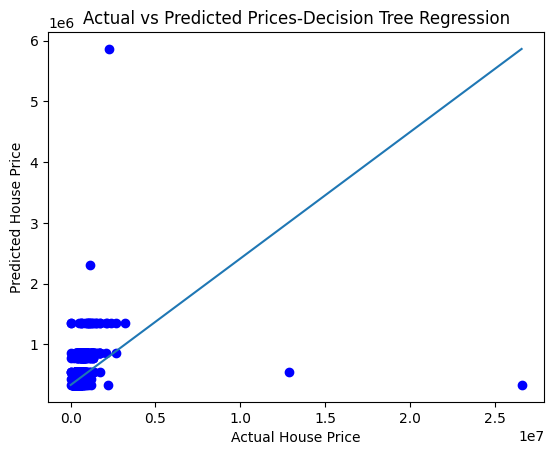

In [ ]:
plt.scatter(y_test,y_pred_df,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_pred_df.min(),y_pred_df.max()])
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted Prices-Decision Tree Regression")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(
    n_estimators=200,
    random_state=42)
rf.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
y_pred_rf=rf.predict(x_test)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("MSE : ",mean_squared_error(y_test,y_pred_rf))
print("r2 score : ",r2_score(y_test,y_pred_rf))

MSE :  981606818222.4431
r2 score :  0.03749537588304841


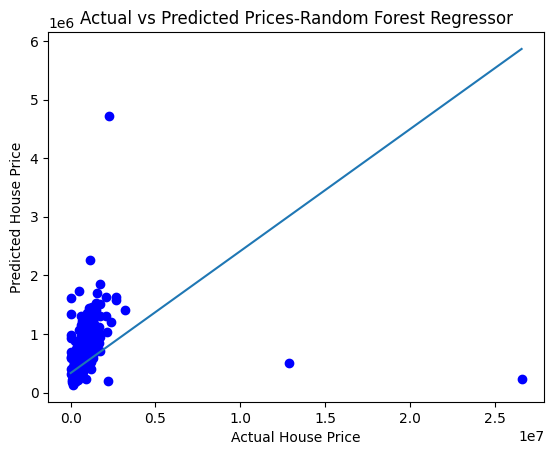

In [ ]:
plt.scatter(y_test,y_pred_rf,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_pred_df.min(),y_pred_df.max()])
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted Prices-Random Forest Regressor")
plt.show()

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
2,sqft_living,0.580708
4,yr_built,0.086079
6,sqft_lot,0.064566
1,bathrooms,0.043312
9,city_Bellevue,0.028311
41,city_Seattle,0.023563
5,yr_renovated,0.022297
0,bedrooms,0.019193
28,city_Medina,0.019177
29,city_Mercer Island,0.018376
